In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Cargar los archivos Excel en dataframes
df_costos = pd.read_excel('Costos_Subprocesos.xlsx')
df_indicadores = pd.read_excel('Indicadores_Minas.xlsx')

In [12]:
df_costos.head()

,Subproceso_Costo,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,Suma de 2022-12
0,ADM OPERACIÓN Y GESTIÓN ESP,1.807849e+06,1.711772e+06,4.128463e+06,4.332170e+06,2.564219e+06,4.684828e+06,4.113938e+06,5.891754e+06,5.974625e+06,...,1.580928e+06,1.417610e+06,1.308925e+06,1.683004e+06,1.413552e+06,1.600869e+06,1.747107e+06,1.719966e+06,1.801845e+06,2.396391e+06
1,ADM OPERACIÓN Y GESTIÓN ESP SUR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.083898e+05,7.047035e+04,9.468913e+04,1.124698e+05,3.724617e+05,2.518037e+05,2.535254e+05,2.650761e+05,2.827665e+05,3.792007e+05
2,ADM OPERACIÓN Y GESTIÓN LLANO,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,ADM OPERACIÓN Y GESTIÓN MIR,9.242919e+04,8.833144e+04,1.324509e+05,7.738629e+04,-2.395468e+04,9.112049e+04,7.226136e+04,1.102093e+05,6.498472e+04,...,2.420369e+05,2.536395e+05,2.605207e+05,1.462361e+05,1.592331e+05,2.636673e+05,2.364017e+05,2.082570e+05,5.274278e+04,8.885885e+04
4,ADM OPERACIÓN Y GESTIÓN OXE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.041830e+05,4.731053e+04,7.563279e+04,8.474667e+04,8.205305e+04,9.830424e+04,1.026369e+05,1.038326e+05,1.573018e+05,1.699898e+05


In [13]:
df_indicadores.head()

,Mina_Indicador,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Mineral sulfuros extraído En Total Mina Centinela,2978.765258,2784.541123,2773.899621,2117.070628,2323.281538,2066.280390,2373.261335,2109.814402,1559.339667,...,3861.492324,3153.605080,3834.856792,3175.766206,3345.505282,2910.128386,2784.216629,2765.141572,2884.413208,3843.271678
1,sulfuros - Ley de Cu En Total Mina Centinela,0.404918,0.449677,0.475481,0.421988,0.507226,0.634907,0.648787,0.762773,0.694293,...,0.003458,0.003725,0.003851,0.003814,0.004057,0.004535,0.005040,0.004662,0.004572,0.004320
2,sulfuros - Ley de Mo En Total Mina Centinela,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,74.787616,78.575286,84.275143,102.423912,81.249208,71.613085,103.457539,104.841606,116.295917,83.984638
3,sulfuros - Ley de Au En Total Mina Centinela,0.146590,0.175964,0.194132,0.165607,0.172549,0.292062,0.244830,0.334901,0.276666,...,0.047887,0.047590,0.063344,0.065821,0.084241,0.137631,0.153051,0.136212,0.142291,0.143770
4,sulfuros - Ley de Ag En Total Mina Centinela,1.131281,1.233528,1.259068,0.987502,1.303414,1.560968,1.513455,1.909860,0.276666,...,0.621604,0.653625,0.684214,0.747140,0.924332,1.119980,1.406413,1.250647,1.337499,1.307796


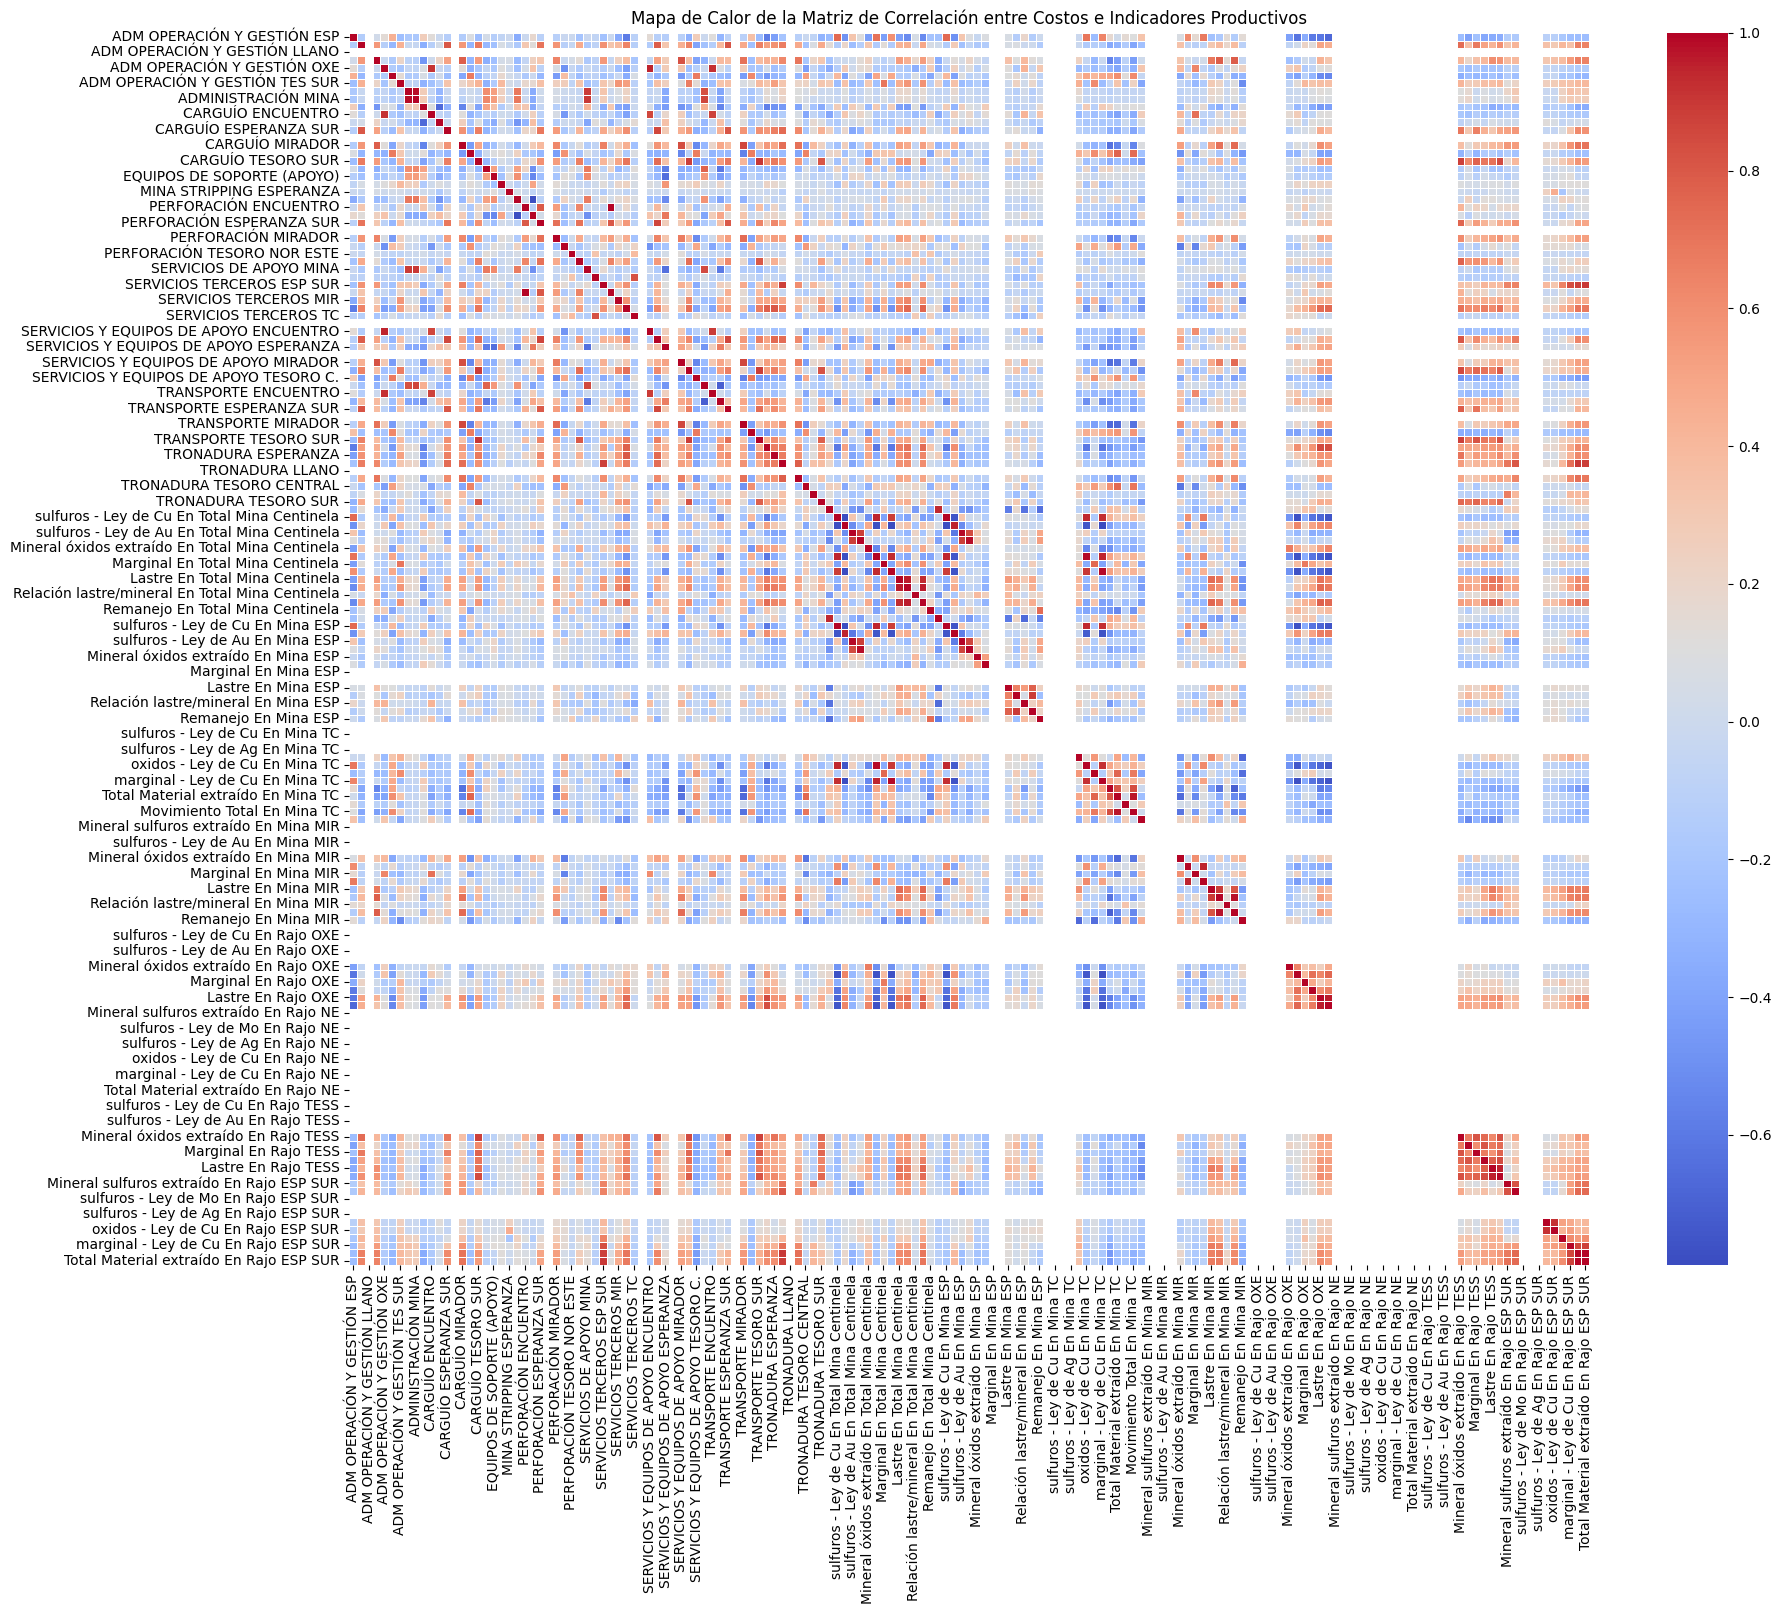

In [2]:
# Transponer ambos DataFrames para que las fechas sean las filas y los subprocesos/indicadores sean las columnas
df_costos_t = df_costos.set_index('Subproceso_Costo').T
df_indicadores_t = df_indicadores.set_index('Mina_Indicador').T

# Alinear temporalmente ambos DataFrames
df_combined = pd.concat([df_costos_t, df_indicadores_t], axis=1, join='inner')

# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()

# Crear el mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación entre Costos e Indicadores Productivos')
plt.show()

In [23]:
# Transponer ambos DataFrames para que las fechas sean las filas y los subprocesos/indicadores sean las columnas
df_costos_t = df_costos.set_index('Subproceso_Costo').T
df_indicadores_t = df_indicadores.set_index('Mina_Indicador').T

# Alinear temporalmente ambos DataFrames
df_combined = pd.concat([df_costos_t, df_indicadores_t], axis=1, join='inner')

# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()

# Filtrar las correlaciones que sean solo entre costos y indicadores
cost_columns = df_costos['Subproceso_Costo']
indicator_columns = df_indicadores['Mina_Indicador']

correlations = correlation_matrix.loc[cost_columns, indicator_columns]

# Mostrar las correlaciones más altas (positivas y negativas)
high_correlations = correlations.unstack().sort_values(ascending=False).dropna()

# Seleccionar las correlaciones significativas (por encima de 0.7 o por debajo de -0.7)
significant_correlations = high_correlations[(high_correlations > 0.5) | (high_correlations < -0.7)]

# Visualizar las correlaciones significativas
significant_correlations.head(50)

Lastre En Rajo ESP SUR                           TRONADURA ESPERANZA SUR                 0.901427
Total Material extraído En Rajo ESP SUR          SERVICIOS TERCEROS ESP SUR              0.901306
                                                 TRONADURA ESPERANZA SUR                 0.887168
Mineral óxidos extraído En Rajo TESS             TRANSPORTE TESORO SUR                   0.880949
Lastre En Rajo ESP SUR                           SERVICIOS TERCEROS ESP SUR              0.877594
Mineral óxidos extraído En Rajo TESS             CARGUÍO TESORO SUR                      0.876718
                                                 SERVICIOS Y EQUIPOS DE APOYO TES SUR    0.848900
Total Material extraído En Rajo TESS             CARGUÍO TESORO SUR                      0.843059
Lastre En Rajo OXE                               TRONADURA ENCUENTRO                     0.843033
Total Material extraído En Rajo OXE              TRONADURA ENCUENTRO                     0.836519
marginal - Ley de Cu

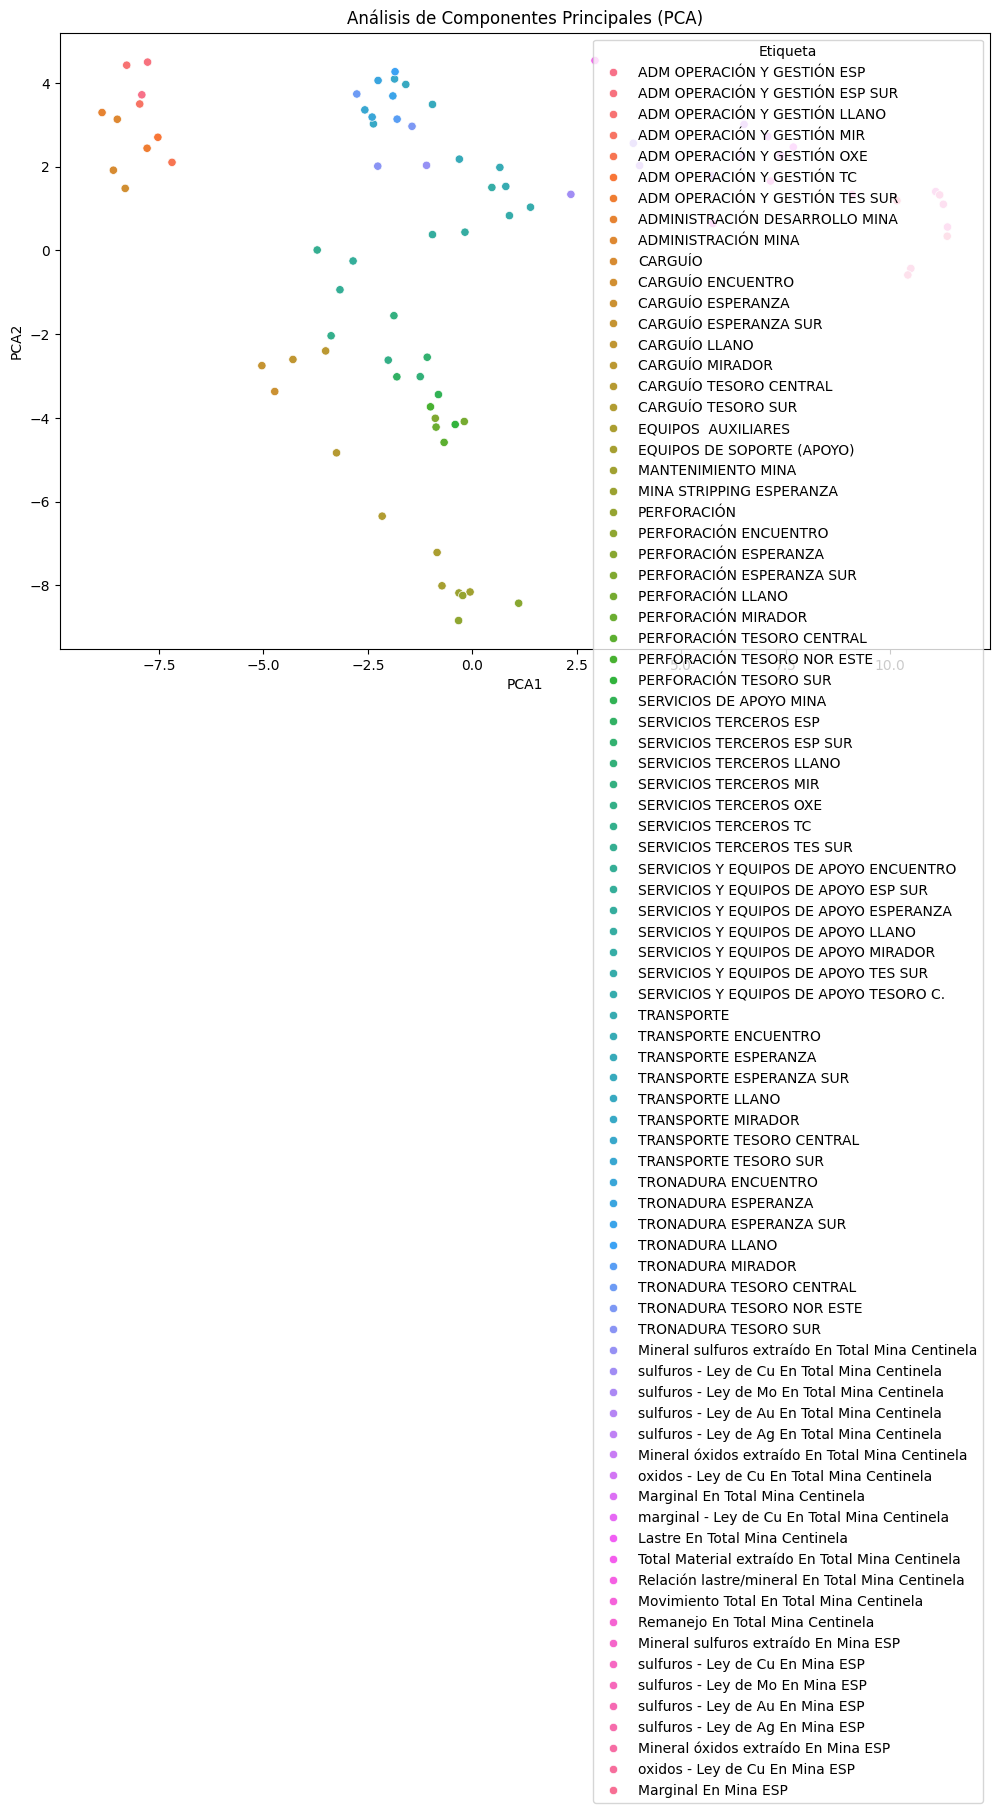

array([0.24339781, 0.11089512])

In [10]:
# Escalar los datos para de aplicar PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_combined)

# Ajustar el número de componentes en el PCA para que coincida con las columnas originales
pca = PCA(n_components=min(df_combined.shape))  # Usar tantas componentes como sea posible
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados del PCA para las primeras dos componentes
pca_df = pd.DataFrame(data=pca_result[:, :2], columns=['PCA1', 'PCA2'])

# Añadir la etiqueta de subprocesos e indicadores para identificar en la visualización
pca_df['Etiqueta'] = df_combined.columns[:len(pca_df)]

# Visualizar los resultados del PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue='Etiqueta')
plt.title('Análisis de Componentes Principales (PCA)')
plt.show()

# Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_[:2]
varianza_explicada

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
df_costos = pd.read_excel('Costos_Subprocesos.xlsx')
df_indicadores = pd.read_excel('Indicadores_Minas.xlsx')

# Transponer para tener las fechas como filas
df_costos_t = df_costos.set_index('Subproceso_Costo').T
df_indicadores_t = df_indicadores.set_index('Mina_Indicador').T

# Combinar los DataFrames de indicadores y costos
df_combined = pd.concat([df_indicadores_t, df_costos_t], axis=1)

# Crear X (indicadores) y y (costos)
X = df_combined[df_indicadores['Mina_Indicador'].values]
y = df_combined[df_costos['Subproceso_Costo'].values]

# Imputar valores faltantes en X e y utilizando la media
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)

# Dividir los datos en entrenamiento, validación y prueba (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y_imputed, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definir los parámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Evaluar el mejor modelo en el conjunto de prueba
best_rf = grid_search.best_estimator_
y_test_pred_rf = best_rf.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

# Resultados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"MSE en el conjunto de prueba: {test_mse_rf}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
416 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python3

Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MSE en el conjunto de prueba: 904204615898.7755
